# TANZANIA WATER WELLS CLASSIFICATION

Reporting, Analyisis, Modelling & Presentation by Mary, Darvin, Shadack & Marvin (Team 5)

Period: May 2023

We shall be using the CRoss-Industry Standard Process for Data Mining (CRISP-DM) Framework to organize this project.

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling & Evaluation
- Recommendations/Conclussion

## BUSINESS UNDERSTANDING

anzania is an East African developing country known for its vast wilderness areas and an estimated population of 63 Million in East Africa. One of the key challenges faced by most developing countries in the region is access & provision of clean water; this problem is exacerbated during the dry seasons when majority of existing wells run dry. Despite the establishment of many water points in the country, some are in need of repair while others have failed altogether.

### Objective

1.1.0- Main Objective
To predict the condition of water wells in Tanzania using information about the pumps, installation dates and location. The information gathered will be used to provide insights to the Tanzanian government and decision makers on how to plan in future for the installation, repair and maintenace of wells.

1.1.1 
To identify wells that are in need of repair or have failed completely, which could help the government or NGOs to plan and prioritize the maintenance and repair work.

1.1.2
To analyze the data, then identify patterns and trends to enable the Tanzanian government make informed decisions on where new wells can be built and ideal locations.

1.1.3 
To Develop a machine learning classifier model to predict the status of water wells in Tanzania.

1.1.4
The model shoud be able to predict which pumps are functional, which need some repairs, and which don't work at all.

## Data Understanding

Data Sets complied an provided by Taarifa and Tanzanian Ministry of Water as below:

- *Test set values*: The independent variables that need predictions
- *Training set labels*: The dependent variable (status_group) for each of the rows in Training set values
- *Trainig set values*: The independent variables for the training set

Our goal is to predict the operating condition of a waterpoint for each record in the dataset. We are provided the following set of information about the waterpoints. We shall proceed to preprocess both the traiing and testing data sets before we subject them to our model.

Target variable: Status_Group

Features as highlighted below:

- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- payment_type - What the water costs
- water_quality - The quality of the water
- quantity - The quantity of water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint

## DATA PREPARATION

### Importing Necessary Libraries, Loading & Inspecting Datasets

In [12]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
sns.set_style("whitegrid")

In [13]:
#importing available data sets

#Importing the Training set values.
training_values = pd.read_csv('training_set_values.csv')

#Importing Features Data
training_labels = pd.read_csv('training_set_labels.csv')

#Importing the Testing set values for validating the trained model.
test = pd.read_csv('test_set_values.csv')


### Data Cleaning, Exploration & Visualization

In [14]:
# To view the first rows of our dataframe
training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [15]:
training_labels.status_group.value_counts()
# To count how many instances belong to each category in the status_group column in the training_labels dataset
#  This will enable us to see the distribution of different conditions of the water wells in our data set

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

We convert the counts of each category into percentages. This is important in our dataset because it will help us understand the distribution and balance of the different categories in our data. 
- We express counts as percentages to allow easier visualization as well as allow comparison of the differnt categories. 
-Here we needed to understand the prevalence and percentage of functional wells, those that need repair and the non-functioning ones.
- This will help us prioritize maintenance, those that require repair and where resources can be allocated.
- With time, the Tanzanian Government can monitor and track changes in the wells over time by comparing the percentages throughout the different periods and any shifts in the condition of the water wells.

In [16]:
#Converting to %ge
training_labels.status_group.value_counts()/len(training_labels.status_group)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

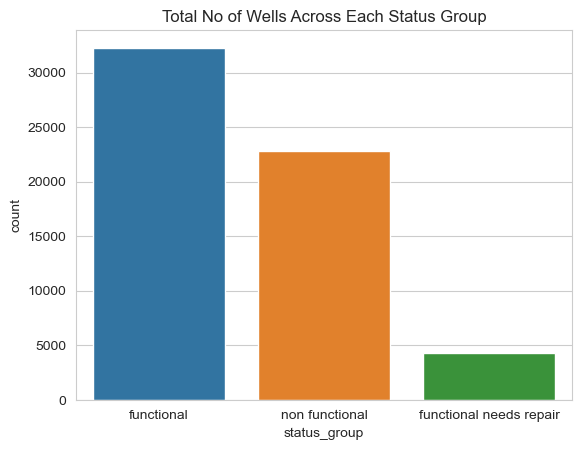

In [17]:
ax = sns.countplot(x='status_group', data=training_labels)
plt.title('Total No of Wells Across Each Status Group')
plt.show()

As per dataset, we have 54.3% of Functional Pumps, 38.4% of non-functional pumps and 7.3% of functional but which needs to be repaired.We have a 54.3% chance that if we take a random pump in the data it shall be a functional one

#### Merging Training Datasets

To get a better understanding of the data while exploring, we merged multiple data sets to allow complete and more accurate analysis which will improve predictions and insights derived from this data. From this, we hope to improve prediction accuracy by identifying any unique relationships/patterns not seen in the individual datasets. 

In [18]:
# to merge the data set into a single dataframe
train_df = pd.merge(training_values, training_labels)

In [19]:
# to display the first few rows of the merged dataset
train_df.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


Inspecting our data further inorder to get more insights of each of the columns. Function to return unique values for all the 41 columns provided in dataset.

- To see the value counts for each unique value in every column of the train_df DataFrame, we looped over each column in the train_df dataFrame  in order to display the count of unique values for each column. 
- This provided insights into the distribution of values within each column, allowing us to understand the frequency of different categories in the dataset.

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [24]:
for val in train_df:
    print(train_df[val].value_counts())
    print()

69572    1
27851    1
6924     1
61097    1
48517    1
        ..
59036    1
56446    1
3855     1
52786    1
26348    1
Name: id, Length: 59400, dtype: int64

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: date_recorded, Length: 356, dtype: int64

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: funde

In [25]:
#Checking Duplicates
print("Number of Duplicates:", train_df.duplicated().sum())

Number of Duplicates: 0


In [26]:
#checking for missing values in the dataset
print("Any missing value?", train_df.isna().values.any())

Any missing value? True


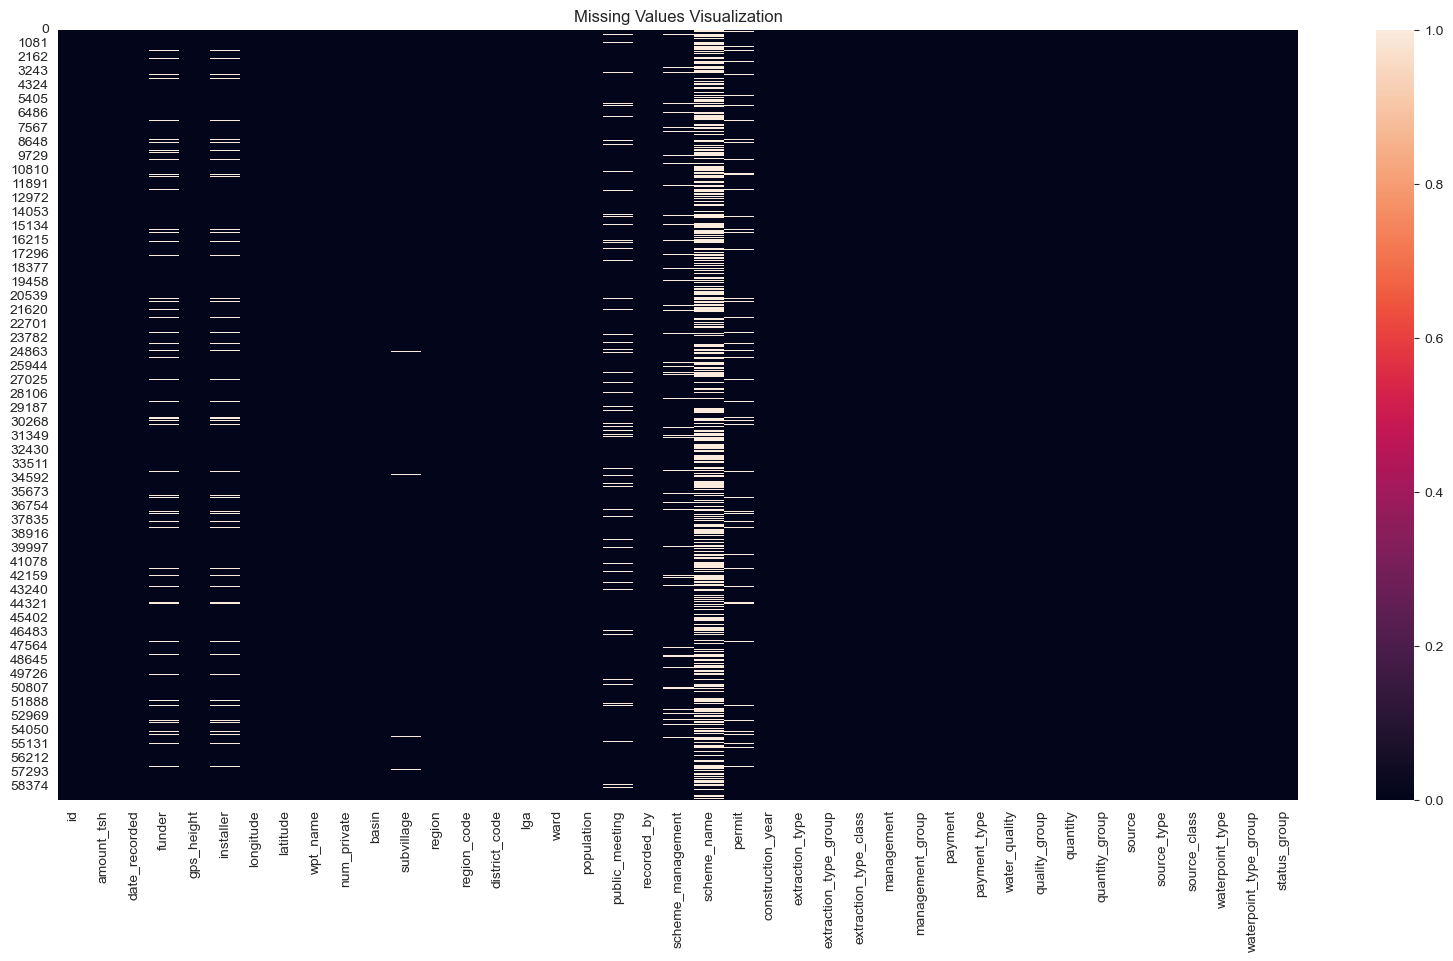

In [27]:
#visualize missing values using seaborn heatmap
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isna())
plt.title("Missing Values Visualization")
plt.show()

In [28]:
# to get the summary of the dataframe structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

There are some null values and some columns which contain same information in the data set
We shall proceed to drop columns because the same values or duplicated values and do not affect our target, and when we simplify our data we can run our models easier.

We shall proceed to drop features with similar data representaion.

In [29]:
#columns with similar attributes: we retain those with much information
train_df = train_df.drop(['id','source','wpt_name', 'num_private', 'region','quantity'],axis = 1)

train_df = train_df.drop(['quality_group','lga','ward','management', 'payment', 
           'extraction_type_group','extraction_type_class'], axis = 1)

In [30]:
# to display the first few rows of the dataset
train_df.head(3)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,...,extraction_type,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,...,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,20,...,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,21,...,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional


Checking features: After cleaning our dataset, we looked at its structure to see what information was contained. 
Null values (missing values)- were identified in order to help us decide if we will drop of fill those values.

In [31]:
# to get the count of missing values in each column of the train_df . 
# to identify which columns have missing data
train_df.apply(lambda x: sum(x.isnull()))

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
basin                        0
subvillage                 371
region_code                  0
district_code                0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
management_group             0
payment_type                 0
water_quality                0
quantity_group               0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
dtype: int64

#### funder column
This column contains a large number of unique categorical values, making it difficult to encode. To simplify the encoding process, we will focus on the top 10 most common values and consider grouping the rest into an "other" category.

In [32]:
# to fill the missing values null values) in the funder column
train_df['funder'].fillna(value='none',inplace=True)
# to replace the string '0' with 'none'
# this made our funder column more consistent alloowing better analysis and modelling
train_df['funder'].replace(to_replace = '0', value ='none' , inplace=True)# filling 0 and null values with none

In [33]:
# to see the top 11 funders with the highest occurrence counts in the 'funder' column of the DataFrame. 
# to deduce insights into the most common sources of funding for the wells in Tanzania.
train_df.funder.value_counts().head(11)

Government Of Tanzania    9084
none                      4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

- We created multiple subsets of the train_df DataFrame based on the values in the 'funder' column.
- Each subset focused on a specific funder then stored it in a separate DataFrame. 
- Then we combined these subsets into a single DataFrame named df_funder using the pd.concat() function.
- The purpose was to gather then analyze data specifically related to those funders.
This allowed us to focus and gather insights into the funding sources and including their impact on the wells in Tanzania.

In [34]:
# to combine all subsets into a single dataframe using pd.concat() function
df1 = train_df.loc[train_df['funder'] == 'Government Of Tanzania']
df2 = train_df.loc[train_df['funder'] == 'Danida']
df3 = train_df.loc[train_df['funder'] == 'Hesawa']
df4 = train_df.loc[train_df['funder'] == 'Rwssp']
df5 = train_df.loc[train_df['funder'] == 'World Bank']
df6 = train_df.loc[train_df['funder'] == 'Kkkt']
df7 = train_df.loc[train_df['funder'] == 'World Vision']
df8 = train_df.loc[train_df['funder'] == 'Unicef']
df9 = train_df.loc[train_df['funder'] == 'Tasaf']
df10 = train_df.loc[train_df['funder'] == 'District Council']
df_funder = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
# new DataFrame contains all the rows from the original DataFrame 
# the 'funder' column matches the specified funders.

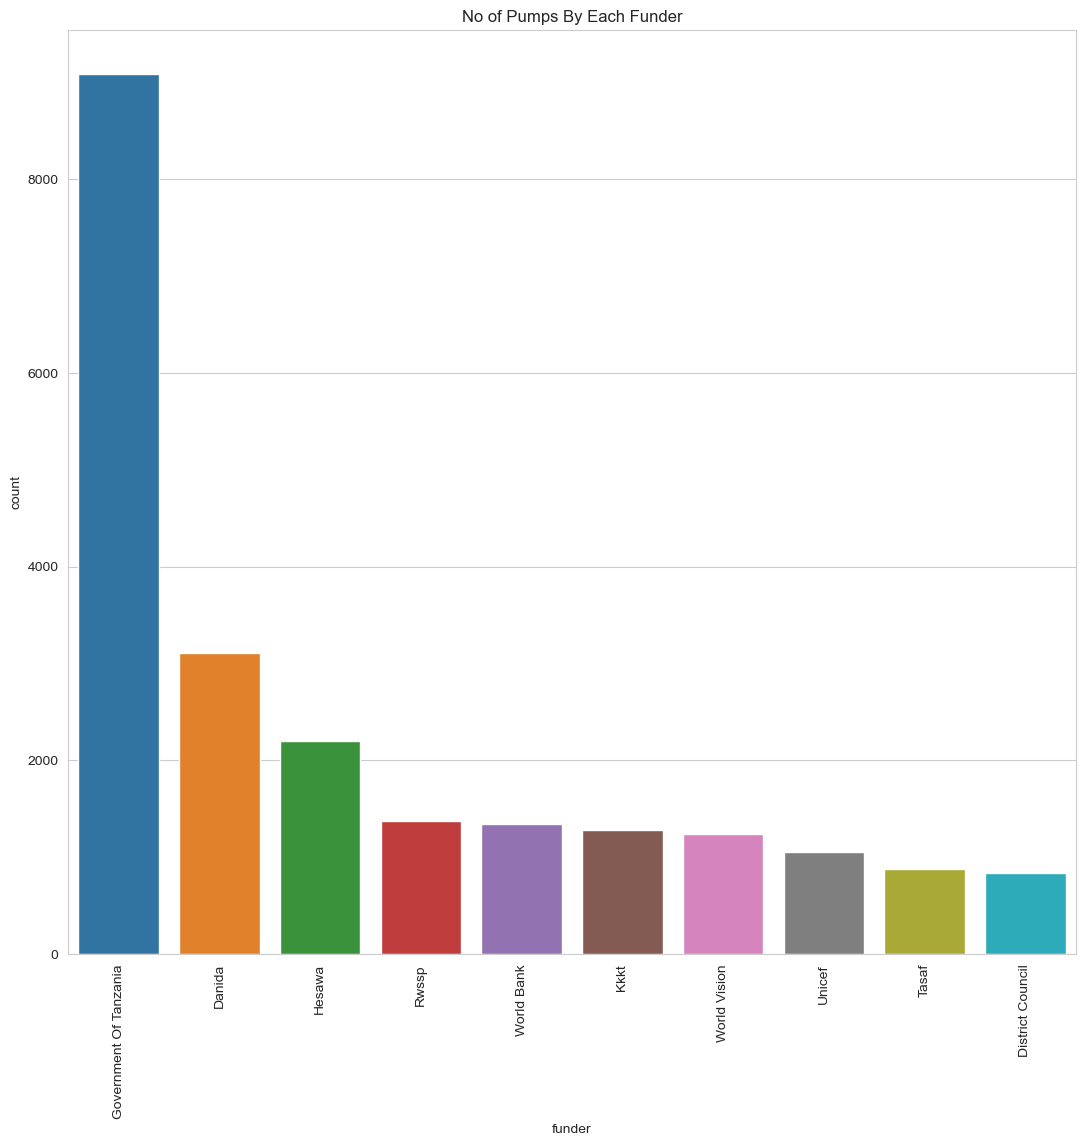

In [35]:
plt.figure(figsize=(13,12))
ax = sns.countplot(x='funder', data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('No of Pumps By Each Funder')
plt.show()
# a bar plot showing the number of pumps associated with each funder, allowing us to visualize and compare their contributions.

- We then modified our bar plot to show the number of pumps associated with each funder
- categorized by the working conditions (status group) of the pumps. 
- This visualization allows us to compare pump distribution among funders 
- Also provided insights into the working conditions of the pumps associated with each funder.

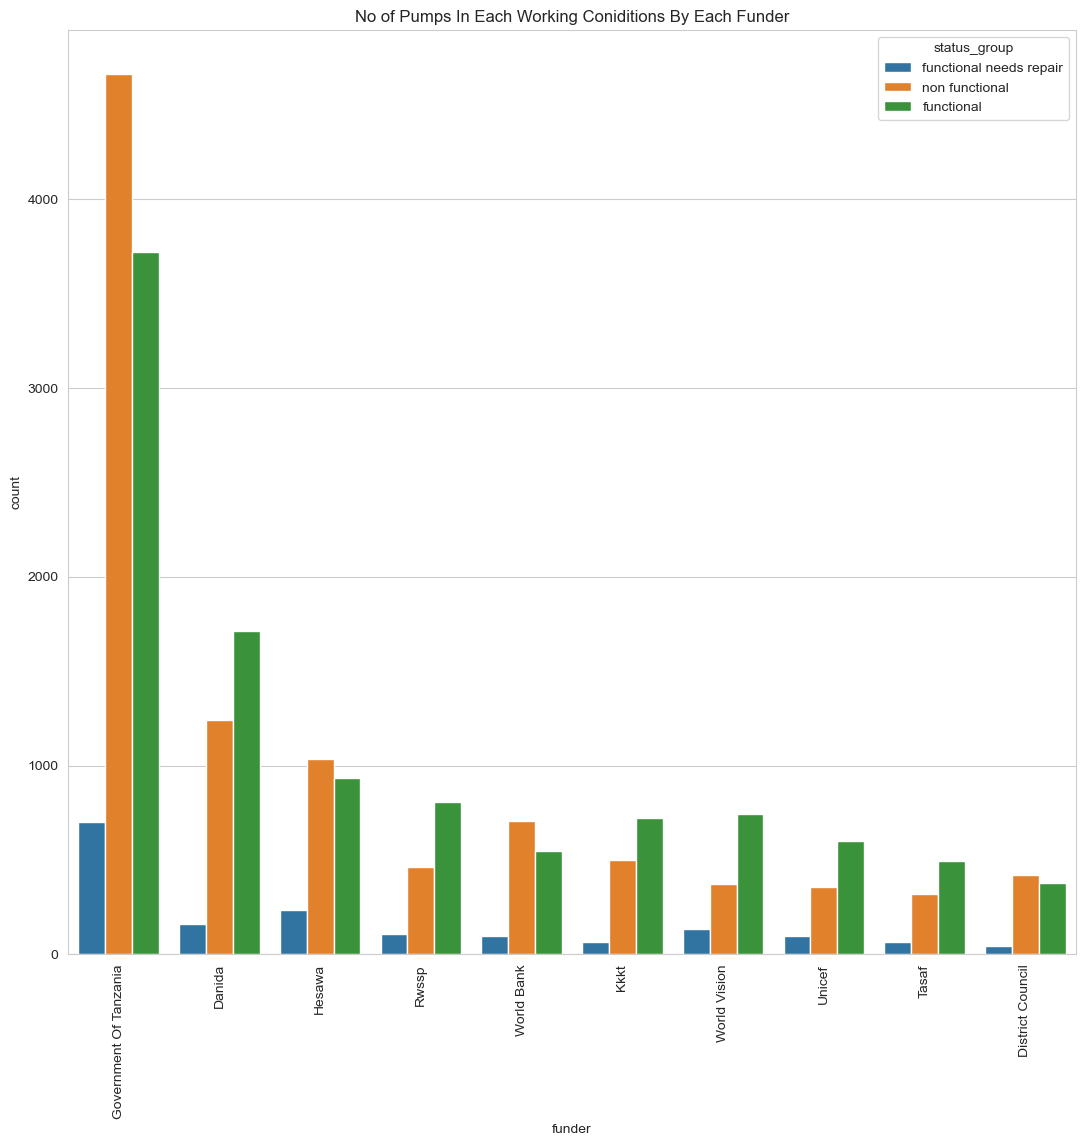

In [36]:
plt.figure(figsize=(13,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('No of Pumps In Each Working Coniditions By Each Funder')
plt.show()

Most of the water points which are funded by government are non-functional.

We created a new column called 'funder_cat' in the train_df DataFrame then assigned the values from the existing 'funder' column to it.This created a duplicate column with a different name and allowed us to analyze and compare data based on the grouped funders.

This provided a consolidated view of the funders while categorizing the remaining ones as "Others."

Specific funders in c_fund retained their original names, while all other funders were labeled as "Others" in the 'funder_cat' column. Grouping was done for the purpose of simplifying and aggregating the data based on the funders.

In [37]:
# To group values together

train_df['funder_cat'] = train_df['funder'] #creating new column

c_fund = ['Danida','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council']

train_df.loc[~train_df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [38]:
# to obtain the no of unique values
train_df['funder_cat'].nunique()
# This count represents the number of distinct funders after the grouping operation. 
# Each unique value corresponds to a specific funder category, including the individual funders explicitly mentioned and the "Others" category.
# We have 11 unique values for this column

11

- We decided to remove the 'funder' column from our data frame
- it was no longer important for analysis since it was replaced by a new column 'funder_cat', which captures the  grouped categories.

In [39]:
# Now that we have categorized funder column, we can proceed to drop it
train_df.drop(columns=['funder'],inplace=True )

#### installer column

There are lots of NaN and 0 values in this column. Firstly, we will convert them to none.

In [40]:
train_df['installer'].fillna(value='none',inplace=True)  # filling null values with none
train_df['installer'].value_counts().head(100).sum()# to check the first common 100 values sum

47234

In [41]:
train_df['installer'].replace(to_replace = '0', value ='none' , inplace=True)# filling 0 values with none

In [42]:
#correct name mistakes

train_df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

train_df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
train_df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

train_df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

train_df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

train_df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

train_df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

train_df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
train_df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

train_df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

train_df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

train_df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

train_df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [43]:
# continue to replacing spellin mistakes and getting together values
train_df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
train_df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
train_df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
train_df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
train_df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
train_df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
train_df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
train_df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
train_df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
train_df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [44]:
round((47237*100)/59400,2) # percentage of seeing value counts of installer

79.52

- We examined the first 100 value counts of the 'installer' column and found some installer names written with slight variations, such as 'District Council' and 'District council'. 
-Therefore, we standardized these values. Since the first 100 value counts cover 47,237 instances, representing 79.5% of the data, we are confident that our standardization efforts will be effective.
- Next, we identified the 10 most common values in the 'installer' column and created a visualization to examine their distribution. 
-To ensure the graph is clear and informative, we excluded values with a count less than 400, as they do not represent a significant proportion of the data.

In [45]:
train_df['installer'].value_counts().head(11) #writing the most 10 common installer

DWE                   17402
none                   4432
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
Name: installer, dtype: int64

- We created a new DataFrame df_installer that contained rows from the train_df DataFrame where the 'installer' column matched specific installer names. 
- This allowed for further analysis and comparison of data related to different installers.
- A new dataframe allows for separate handling and analysis of the filtered rows based on installer names, providing a more organized and focused approach to working with specific subsets of the data.
- By filtering and creating a new DataFrame based on installer categories, we were able to gain insights on the water wells installed by different entities in Tanzania. 

In [46]:
df_1 = train_df.loc[train_df['installer']== 'DWE']
df_2 = train_df.loc[train_df['installer']== 'Government']              
df_3 = train_df.loc[train_df['installer']== 'Community'] 
df_4 = train_df.loc[train_df['installer']== 'DANIDA'] 
df_5 = train_df.loc[train_df['installer']== 'RWE'] 
df_6 = train_df.loc[train_df['installer']== 'District council'] 
df_7 = train_df.loc[train_df['installer']== 'Central government'] 
df_8 = train_df.loc[train_df['installer']== 'KKKT']
df_9 = train_df.loc[train_df['installer']== 'HESAWA'] 
df_10 = train_df.loc[train_df['installer']== 'TCRS'] 
df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10], ignore_index=True)

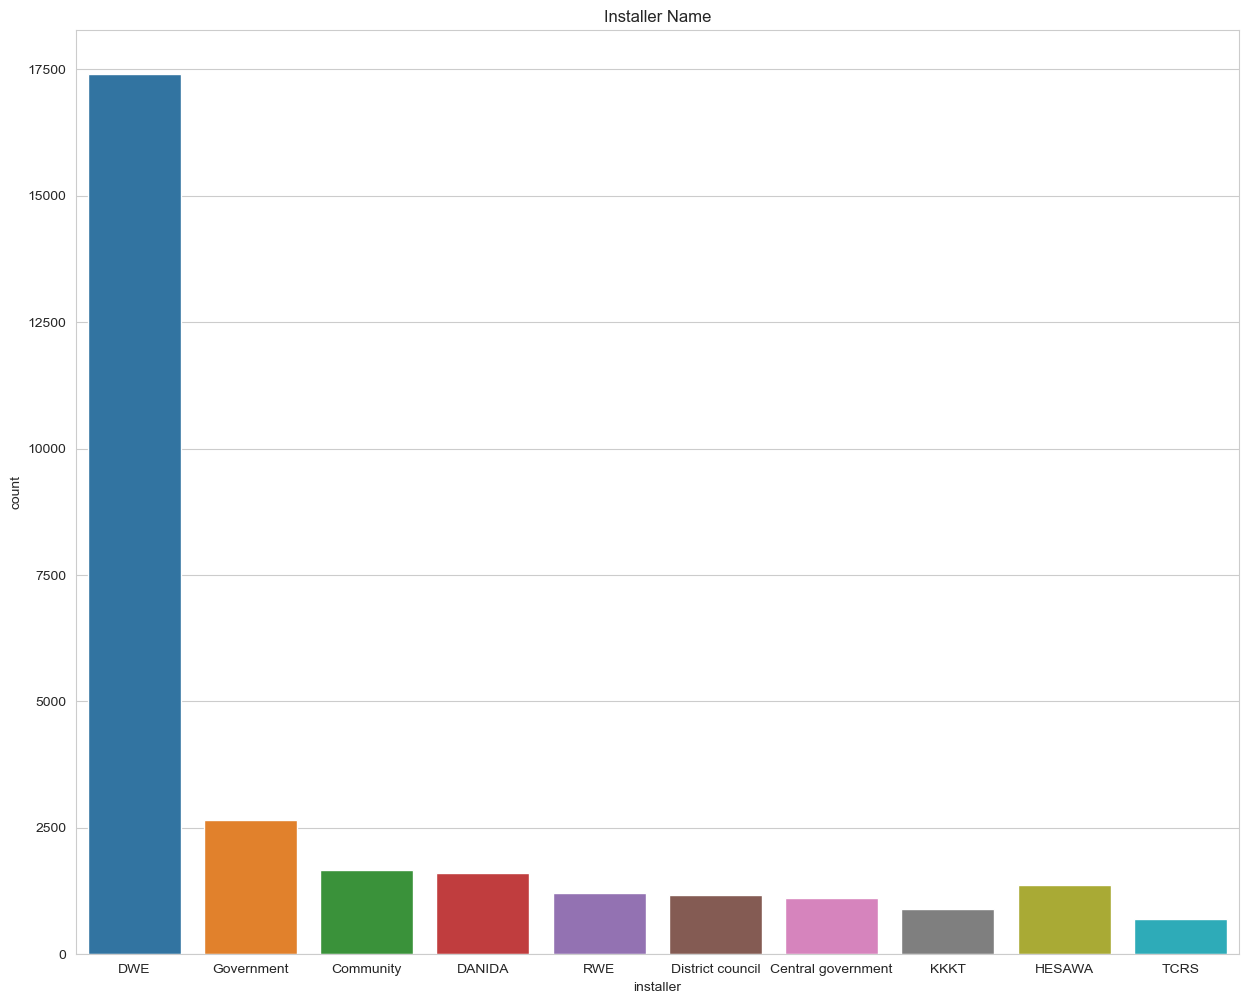

In [47]:
plt.figure(figsize=(15,12))
ax = sns.countplot(x='installer',data=df_installer)
plt.title('Installer Name')
plt.show()
# a countplot that visualizes the distribution of water wells across different installers
# the number of wells installed by each installer category 
# provided insights into the prevalence and contribution of different installers in the dataset.

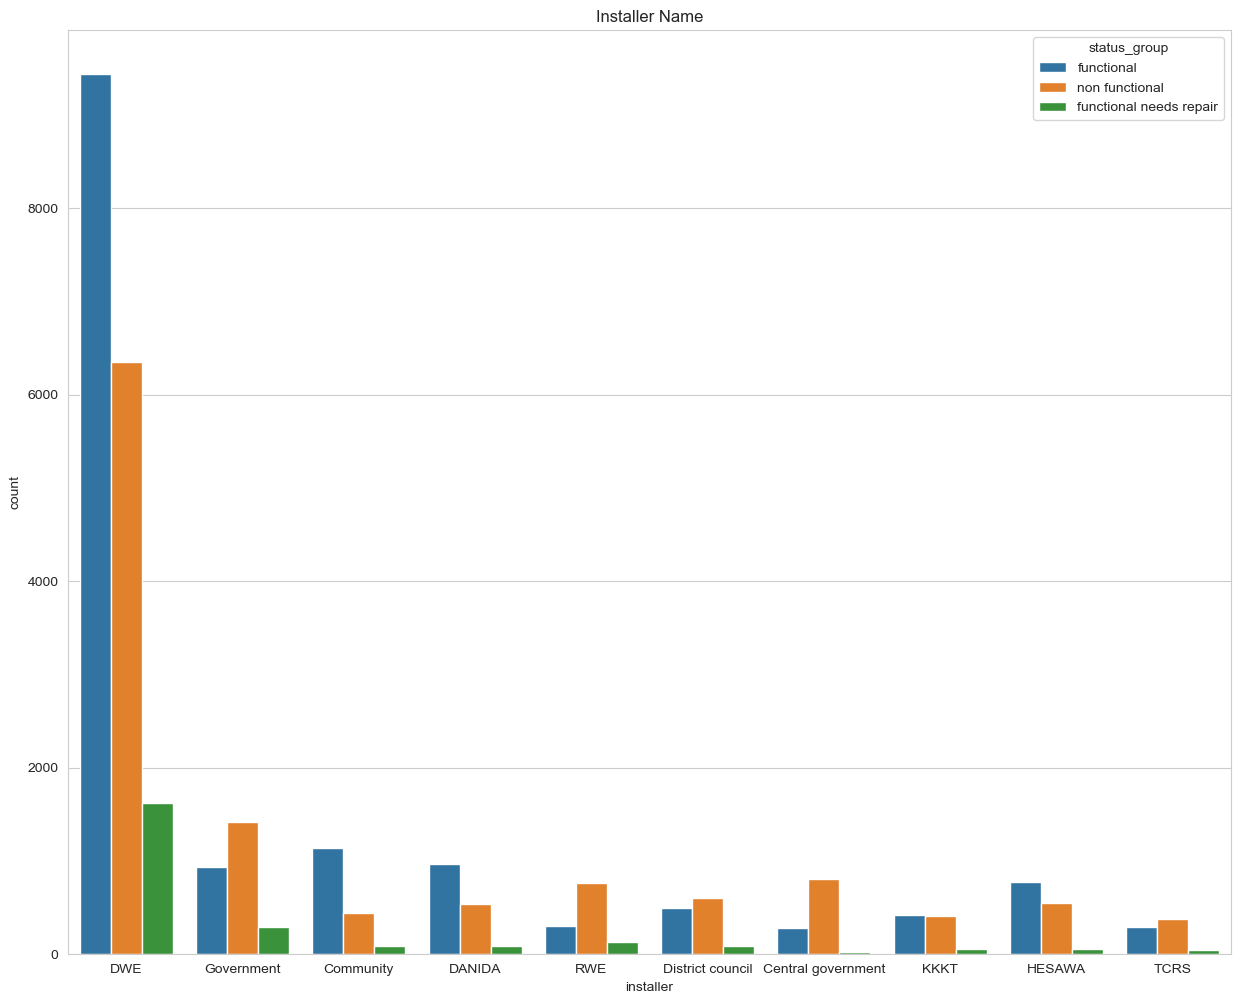

In [48]:
plt.figure(figsize=(15,12))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)
plt.title('Installer Name')
plt.show()
# a countplot visualization using Seaborn library to show the distribution of water wells across different installers in the df_installer DataFrame, 
# categorized by the status group of the wells.
# The plot will show the number of wells installed by each installer category, with different colors representing the status groups 
# (e.g., functional, non-functional, need repair). 
# This visualization helps in understanding the distribution of well statuses across different installers.

- Majority of water points which central government and district council installed are non-functional. 
- DWE has the majority of functional wells but has also many non-functional wells.
- To simplify our encoding later on, we collected installers which had less than 400 value counts together and named them others.

In [49]:
installer_counts = train_df['installer'].value_counts()
others = installer_counts[installer_counts < 400].index.tolist()
train_df['installer'].replace(to_replace=others, value='Other', inplace=True)

In [50]:
 # To make new categorizes, creating new column
train_df['installer_cat'] = train_df['installer']

In [51]:
# to convert the values which have less than 400 value counts to "others"
c_ins = ['DWE','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS']

train_df.loc[~train_df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"

In [52]:
train_df['installer_cat'].nunique() # We have 11 unique values for this column

11

In [53]:
# Now that we have categorized installer column, we can proceed to drop it
train_df.drop(columns=['installer'],inplace=True )

#### subvillage column

In [54]:
train_df.subvillage.value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64

- We only have 19287 out of 54000 values (64% of data missing - which is very significant). 
- Filling the nulls with others shall distort our analysis, hence we shall proceed to drop this column. 
- Noting that district/region code can be used to address this.

In [55]:
train_df.drop(columns=['subvillage'],inplace=True )

#### public_meeting column

In [56]:
train_df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [57]:
train_df.public_meeting = train_df.public_meeting.fillna('Unknown') #Filling the null values with UNKNOWN

#### scheme_management column

In [58]:
train_df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [59]:
#Function Returning Top 10 schemes categorized
def scheme_cl(row):
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'Parastatal'
    elif row['scheme_management']=='Private operator':
        return 'pri_optr'
    elif row['scheme_management']=='SWC':
        return 'swc'
    elif row['scheme_management']=='Company':
        return 'company'
    elif row['scheme_management']=='Trust':
        return 'trust'
    else:
        return 'other'
train_df['scheme_management'] = train_df.apply(lambda row: scheme_cl(row), axis=1)

In [60]:
#Creating new column to categorize status group
replace_values = {'functional':2, 'functional needs repair':1, 'non functional':0}
train_df['status_values']  = train_df.status_group.replace(replace_values)

In [61]:
#creating pivot table to check number of pumps in each working condition, under each scheme management group
piv_df= train_df[['scheme_management','status_group','status_values']]
piv_table = piv_df.pivot_table(index='scheme_management',
                           columns='status_group', aggfunc='count')
piv_table

status_values                                       
status_group         functional functional needs repair non functional
scheme_management                                                     
Parastatal                  966                     202            512
company                     534                      37            490
other                      2332                     245           2067
pri_optr                    729                      23            311
swc                          20                       1             76
trust                        46                       5             21
vwc                       18960                    2334          15499
wtr_auth                   1618                     448           1087
wtr_brd                    2053                     111            584
wua                        1995                     239            649
wug                        3006                     672           1528

Pivot table above details of no.of pumps in each status group and under which scheme management

#### scheme_name column

In [62]:
train_df.scheme_name.value_counts().head(10)

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
DANIDA                         379
Government                     320
Ngana water supplied scheme    270
wanging'ombe water supply s    261
wanging'ombe supply scheme     234
Name: scheme_name, dtype: int64

In [63]:
train_df.scheme_name = train_df.scheme_name.fillna('other') #Filling null values with OTHER

#### permit column

In [64]:
train_df.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [65]:
train_df.permit = train_df.permit.fillna('Unknown') #Fill Null values with UNKNOWN

#### Checking for any missing values

In [66]:
print("Any missing value?", train_df.isna().values.any())

Any missing value? False


In [67]:
#checking data types again.
cols = train_df.select_dtypes(include = ['object'])
cols.apply(lambda x: len(x.unique()))

date_recorded             356
basin                       9
public_meeting              3
recorded_by                 1
scheme_management          11
scheme_name              2697
permit                      3
extraction_type            18
management_group            5
payment_type                7
water_quality               8
quantity_group              5
source_type                 7
source_class                3
waterpoint_type             7
waterpoint_type_group       6
status_group                3
funder_cat                 11
installer_cat              11
dtype: int64

#### construction_year column

In [68]:
# to change the construction year to numeric value
train_df.construction_year = pd.to_numeric(train_df.construction_year)

In [69]:
#conerting to better categories (decades) for better visualization & understanding
def construction_cl(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train_df['construction_year'] = train_df.apply(lambda row: construction_cl(row), axis=1)

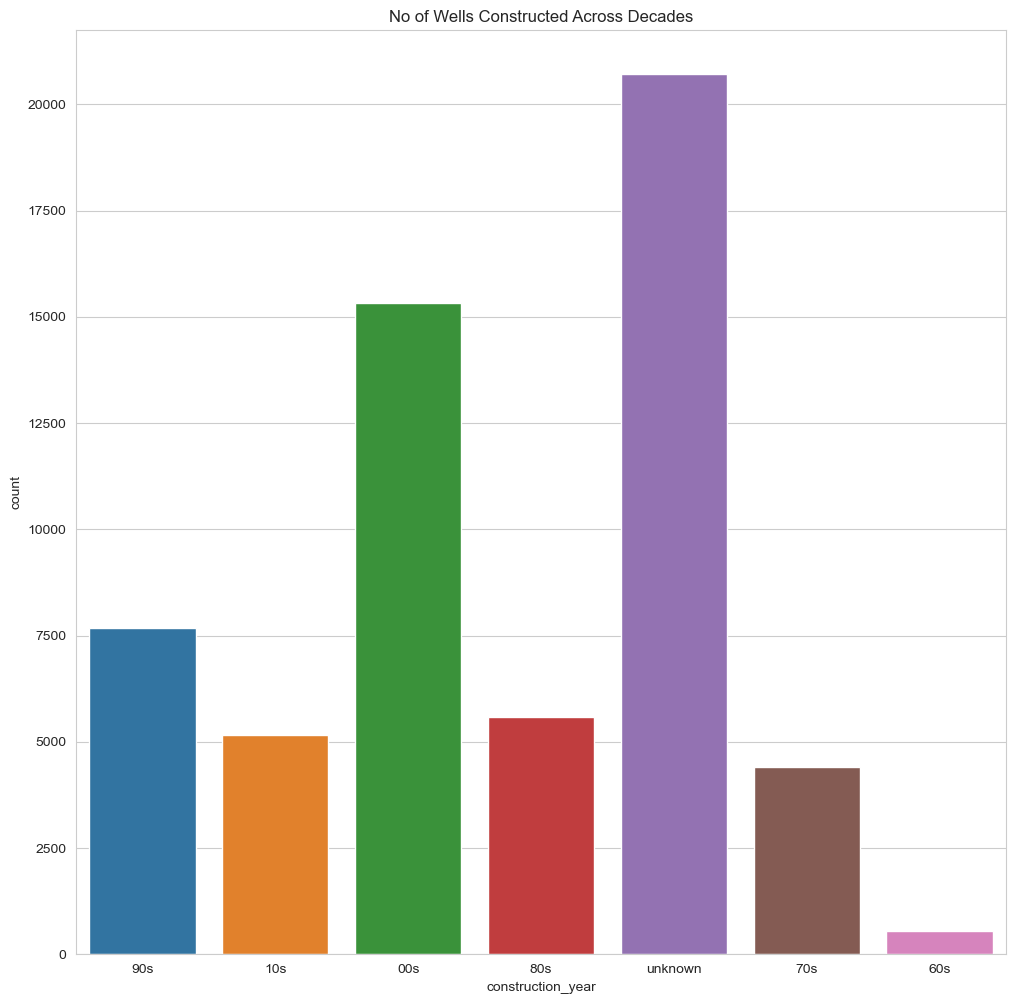

In [70]:
plt.figure(figsize=(12,12))
ax = sns.countplot(x='construction_year', data=train_df)
plt.title('No of Wells Constructed Across Decades')
plt.show()
# a countplot that visualizes the number of water wells constructed across different decades. 
# The plot shows the count of wells constructed in each construction year
# allowing us to observe any trends or patterns in the construction of water wells over time.

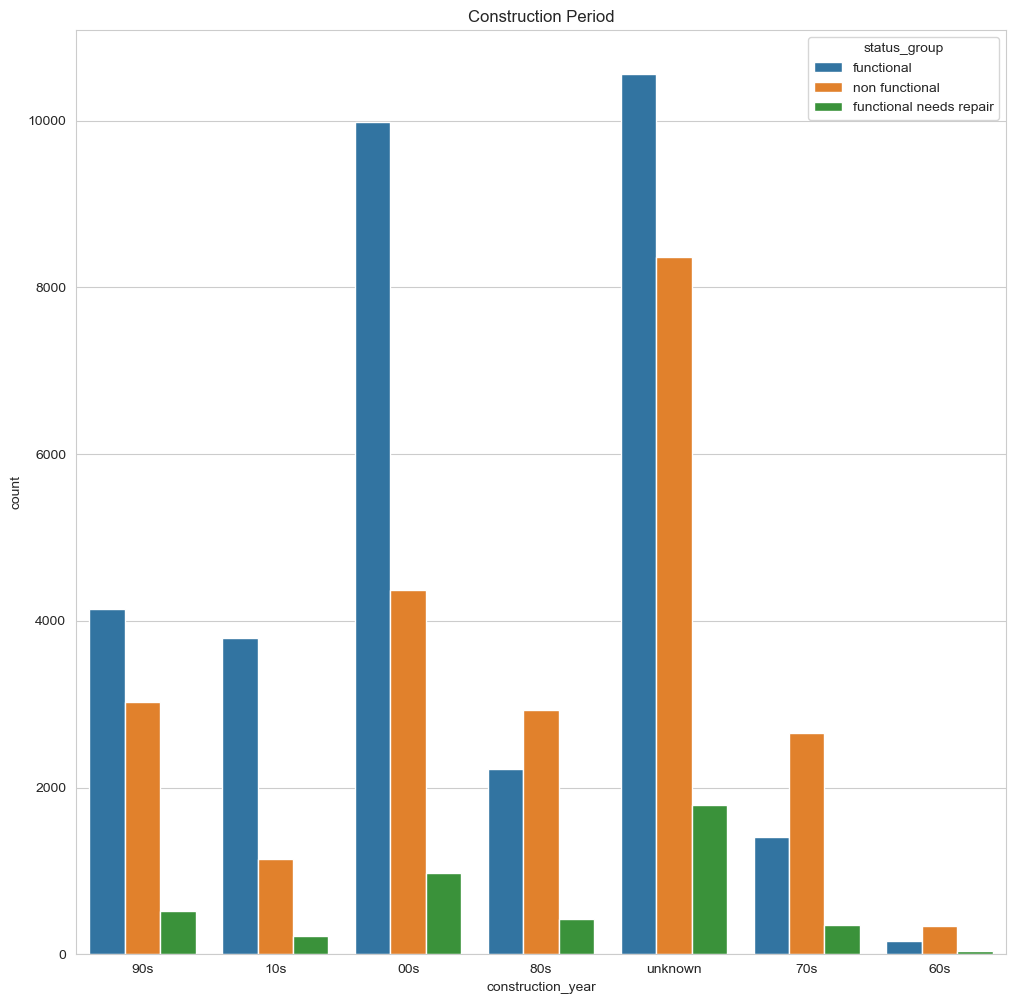

In [71]:
plt.figure(figsize=(12,12))
ax = sns.countplot(x='construction_year', hue="status_group", data=train_df)
plt.title('Construction Period')
plt.show()
# a countplot that visualizes the distribution of water wells across different construction years in the train_df DataFrame
# categorized by the status group of the wells.
# plot will show the count of wells constructed in each construction year, with different colors representing the status groups 
# (e.g., functional, non-functional, need repair). 
# This visualization helped in understanding the distribution and status of wells based on their construction period.

missing values and most recent years have more functional water points.

In [72]:
train_df.head().transpose()

,0,1,2,3,4
amount_tsh,6000.0,0.0,25.0,0.0,0.0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
gps_height,1390,1399,686,263,0
longitude,34.938093,34.698766,37.460664,38.486161,31.130847
latitude,-9.856322,-2.147466,-3.821329,-11.155298,-1.825359
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria
region_code,11,20,21,90,18
district_code,5,2,4,63,1
population,109,280,250,58,0
public_meeting,True,Unknown,True,True,True


The transposed view of the first five rows of the train_df DataFrame provided a horizontal representation of the data.

Each row represented an individual data point (water well) and each column represents a specific feature or attribute of the wells.

id: A unique identifier for each water well. amount_tsh: The total static head (amount of water available to the waterpoint). date_recorded: The date when the information about the water well was recorded. funder: The organization or entity that funded the construction of the water well. gps_height: The altitude of the well location. installer: The organization or entity that installed the water well. longitude and latitude: The geographical coordinates of the well location. wpt_name: The name of the waterpoint. population: The population around the well. construction_year: The year when the water well was constructed. extraction_type, management, payment_type, etc.: Various attributes related to the extraction type, management approach, and payment method associated with the water well. 

By transposing the DataFrame, the columns were represented as rows, making it easier to understand the values for each feature in the first five water wells.

In [73]:
train_df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [74]:
train_df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [75]:
# For similar columns drop the one with less info
train_df.drop(columns=['waterpoint_type_group'],inplace=True )

In [76]:
# to drop additional columns
train_df.drop(columns=['recorded_by'],inplace=True )

In [77]:
#further droping additional columns that we shall not use in our model
train_df.drop(columns=['amount_tsh'],inplace=True )

In [78]:
train_df.drop(columns=['date_recorded'],inplace=True )

In [79]:
train_df.head().transpose()

,0,1,2,3,4
gps_height,1390,1399,686,263,0
longitude,34.938093,34.698766,37.460664,38.486161,31.130847
latitude,-9.856322,-2.147466,-3.821329,-11.155298,-1.825359
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria
region_code,11,20,21,90,18
district_code,5,2,4,63,1
population,109,280,250,58,0
public_meeting,True,Unknown,True,True,True
scheme_management,vwc,other,vwc,vwc,other
scheme_name,Roman,other,Nyumba ya mungu pipe scheme,other,other


### basin column

In [80]:
train_df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

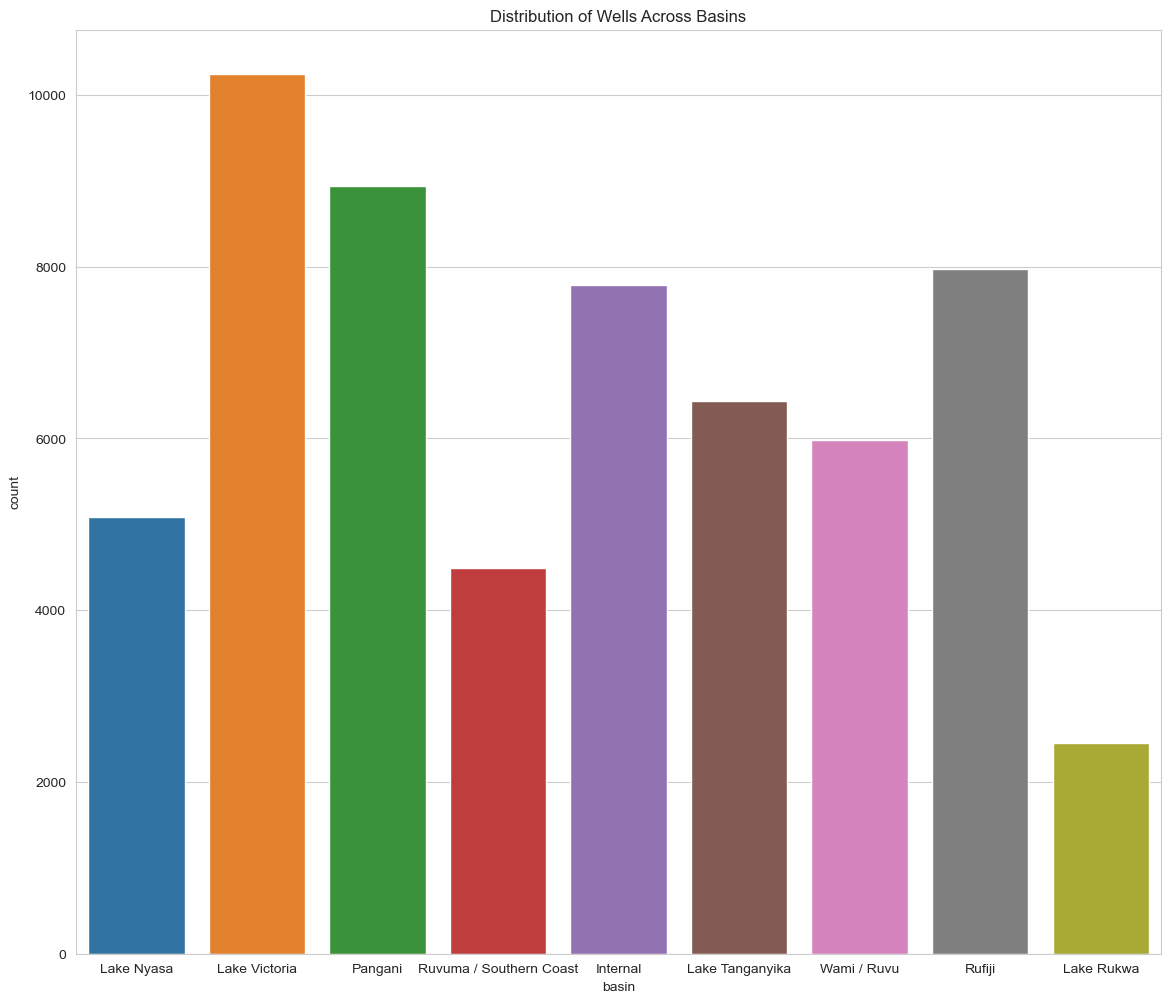

In [81]:
plt.figure(figsize=(14,12))
ax = sns.countplot(x='basin', data=train_df)
plt.title('Distribution of Wells Across Basins')
plt.show()
# a bar plot using Seaborn's countplot function to visualize the distribution of wells across different basins in Tanzania. 
# a visual representation of the number of wells in each basin. Each bar represents a basin
# the height of the bar indicates the count of wells in that particular basin.

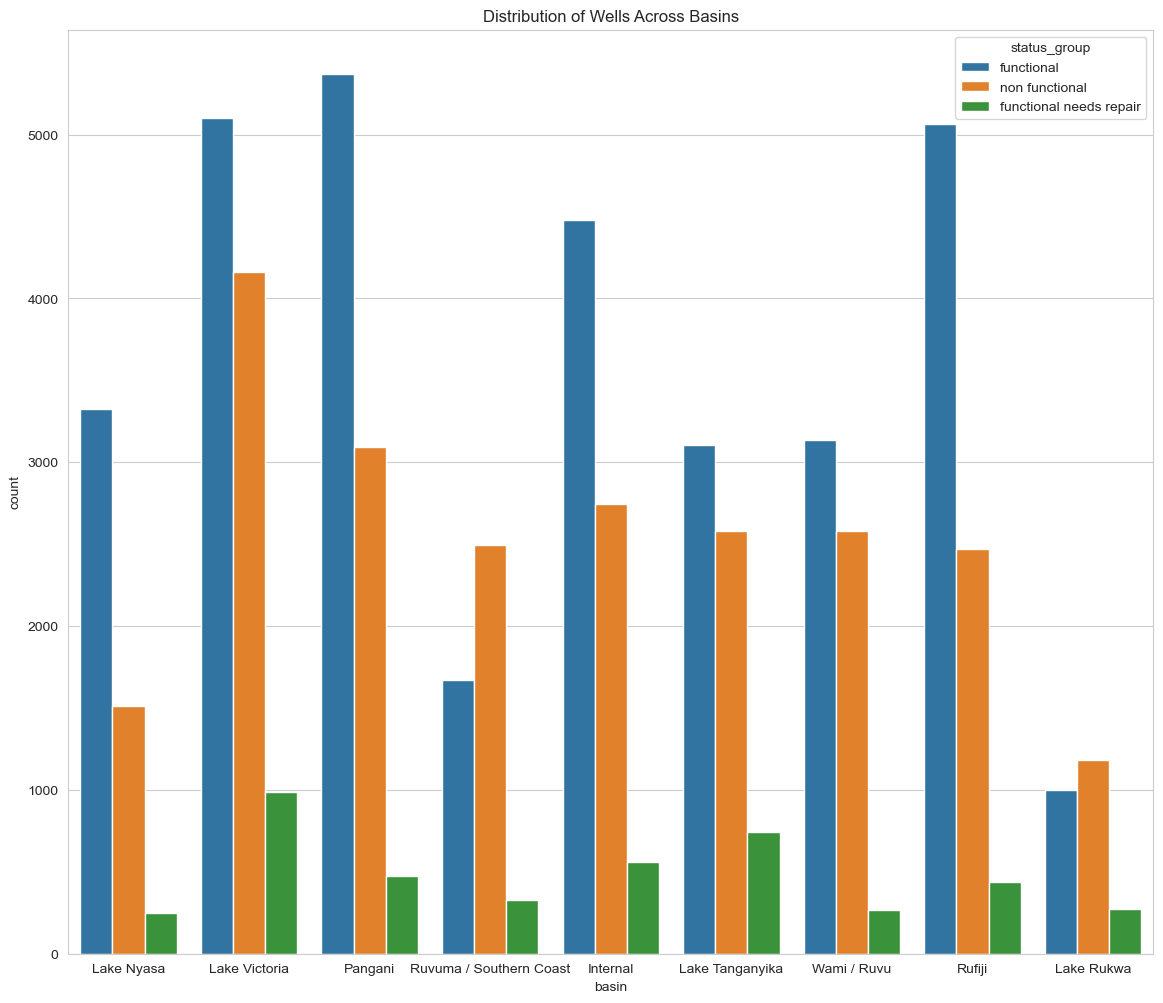

In [82]:
plt.figure(figsize=(14,12))
ax = sns.countplot(x='basin', hue="status_group", data=train_df)
plt.title('Distribution of Wells Across Basins')
plt.show()
# a grouped bar plot using Seaborn's countplot function to visualize the distribution of wells across different basins in Tanzania
# categorized by the status groups of the wells.
# plot shows grouped bars, where each bar represents a basin, and within each bar, the different segments represent the count of wells in each status group
#  (e.g., functional, non-functional, or functional needs repair) within that basin.
# This allows for a visual comparison of the distribution of wells across basins and their respective status groups

there is a correlation between functionality and geographical water basin.

#### extraction_type column

In [83]:
train_df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

- extraction_cl maps the values in the 'extraction_type' column of the train_df DataFrame to a simplified set of extraction types. This maps the original extraction types to a smaller set of simplified extraction types and can be useful for data analysis and modeling purposes.

- It can help reduce the dimensionality of the data and make it easier to interpret and analyze & likewsie assist in identifying patterns or relationships between the simplified extraction types and other variables in the dataset.

- The simplified extraction types can be used as categorical variables in further analysis or modeling tasks. For example, they can be used as input features for a machine learning algorithm to predict the status of water wells based on the extraction type

In [84]:
def extraction_cl(row):
    if row['extraction_type']=='gravity':
        return 'gravity'
    elif row['extraction_type']=='nira/tanira':
        return 'nira'
    elif row['extraction_type']=='submersible':
        return 'submersible'
    elif row['extraction_type']=='swn 80':
        return 'swn'
    elif row['extraction_type']=='mono':
        return 'mono'
    elif row['extraction_type']=='india mark ii':
        return 'indiamark2'
    elif row['extraction_type']=='afridev':
        return 'afridev'
    elif row['extraction_type']=='ksb':
        return 'ksb'
    elif row['extraction_type']=='windmill':
        return 'windmill'
    elif row['extraction_type']=='india mark iii':
        return 'indiamark3'
    else:
        return 'other'
train_df['extraction_type'] = train_df.apply(lambda row: extraction_cl(row), axis=1)
# To preprocess and transform the data to make it more suitable for analysis and modeling purposes

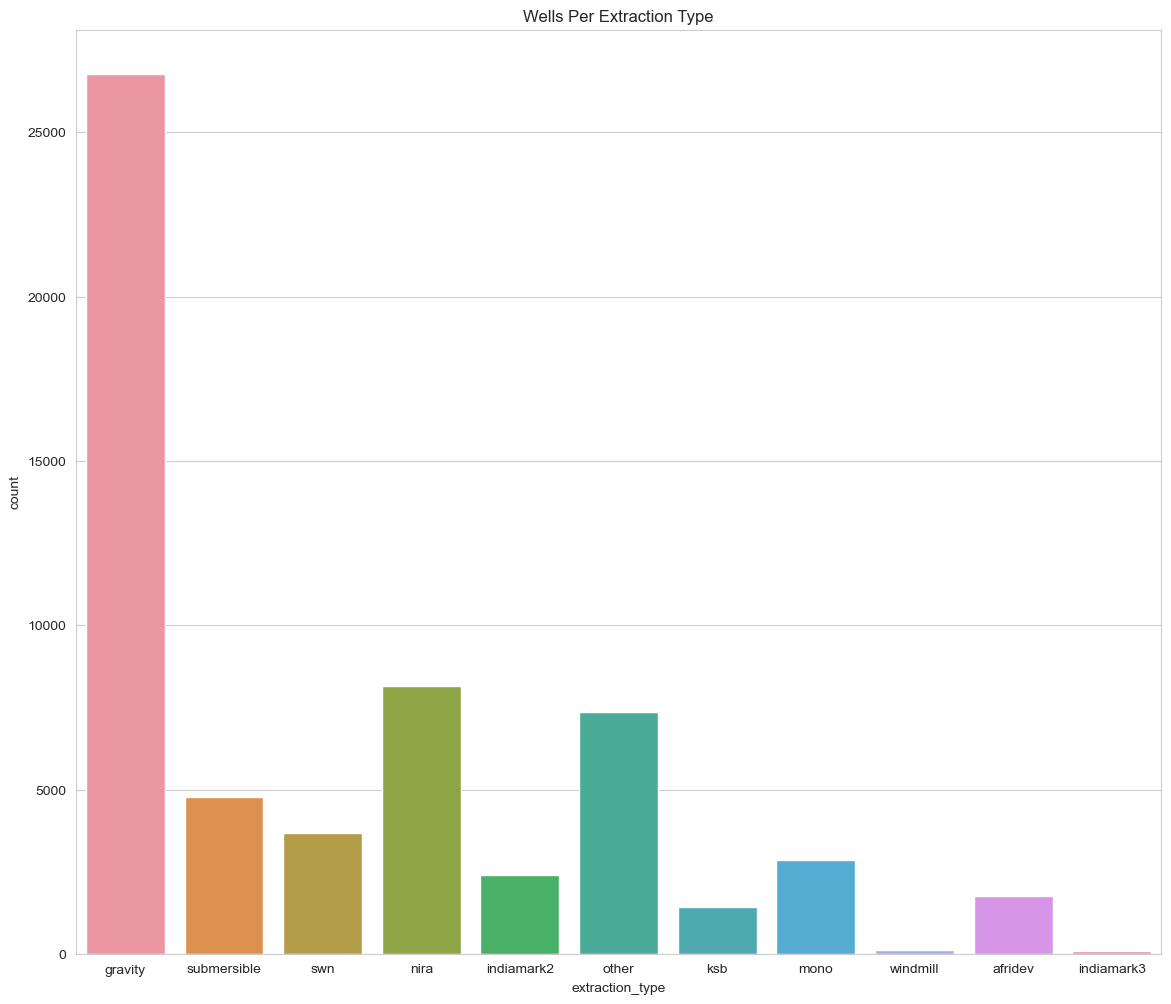

In [85]:
plt.figure(figsize=(14,12))
ax = sns.countplot(x='extraction_type', data=train_df)
plt.title('Wells Per Extraction Type')
plt.show()
# a bar plot using Seaborn's countplot function to visualize the distribution of wells across different extraction types in Tanzania. 
# plot provides a visual representation of the number of wells for each extraction type. Each bar represents an extraction type, 
# the height of the bar indicates the count of wells associated with that extraction type.
# can help in understanding the distribution of wells across different extraction types 
# and identify which extraction types are more prevalent in the dataset.

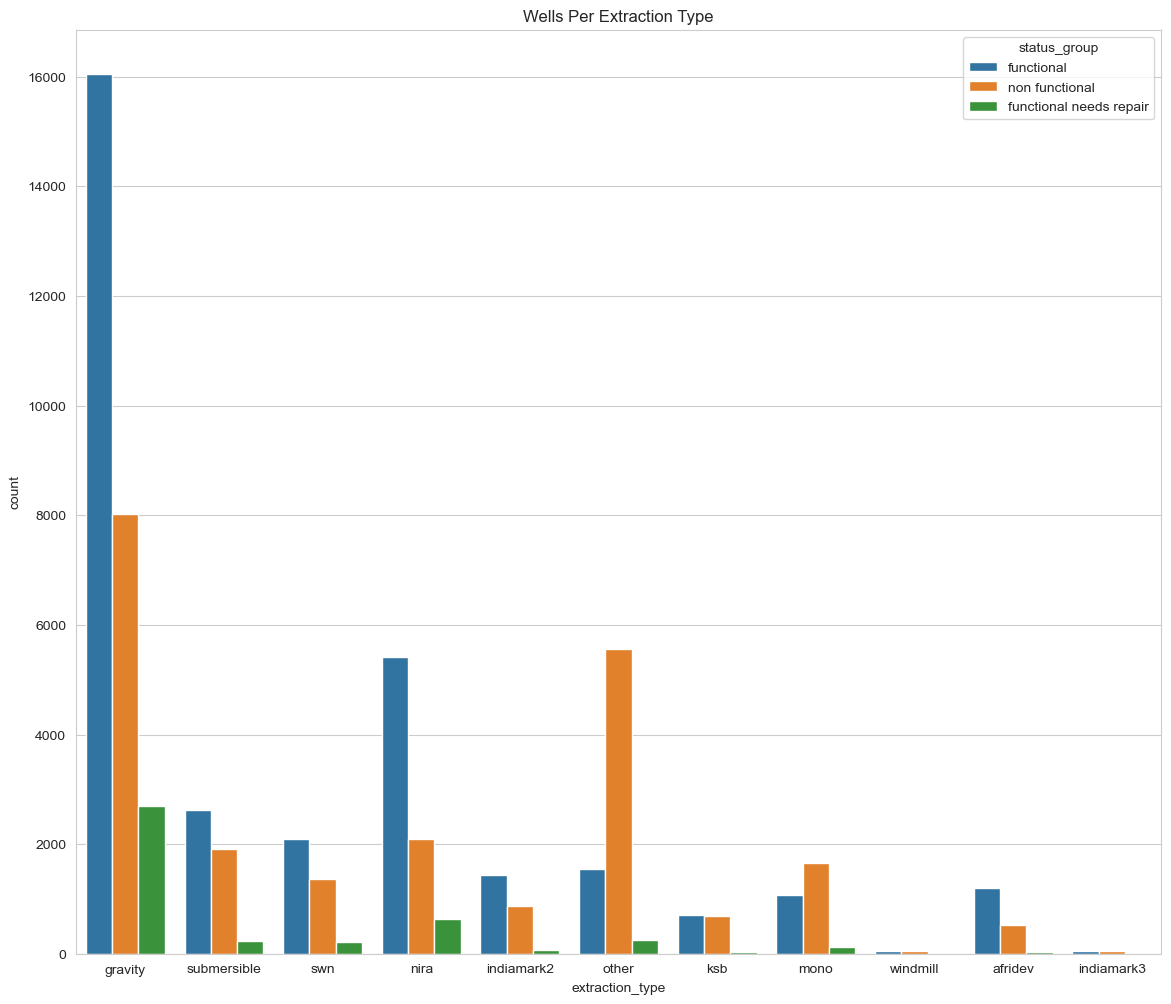

In [86]:
plt.figure(figsize=(14,12))
ax = sns.countplot(x='extraction_type', hue="status_group", data=train_df)
plt.title('Wells Per Extraction Type')
plt.show()
# a grouped bar plot using Seaborn's countplot function to visualize the distribution of wells across different extraction types in Tanzania, 
# categorized by their status groups.
# provides a visual representation of the distribution of wells across different extraction types, categorized by their status groups.
# Each extraction type is represented by a group of bars, where each bar within the group corresponds to a different status group. 
# The height of each bar indicates the count of wells associated with that extraction type and status group.
# plot can help in analyzing the relationship between the extraction type, the status group, and the overall distribution of wells. 
# It can provide insights into which extraction types are more prevalent among functional, non-functional, or need-repair wells.

In [87]:
## almost all are managed by user-group we can drop it
train_df = train_df.drop(['management_group'], axis=1)

In [88]:
#dropping additional columns which we shall not use in our model
train_df = train_df.drop(['longitude', 'latitude', 'region_code', 'district_code'], axis=1)

In [89]:
train_df = train_df.drop(['status_values'], axis=1)

In [90]:
train_df.head().transpose()

,0,1,2,3,4
gps_height,1390,1399,686,263,0
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria
population,109,280,250,58,0
public_meeting,True,Unknown,True,True,True
scheme_management,vwc,other,vwc,vwc,other
scheme_name,Roman,other,Nyumba ya mungu pipe scheme,other,other
permit,False,True,True,True,True
construction_year,90s,10s,00s,80s,unknown
extraction_type,gravity,gravity,gravity,submersible,gravity
payment_type,annually,never pay,per bucket,never pay,never pay


We decided to convert the target variable to binary format 

This is often done in binary classification tasks where the goal is to predict one of two possible outcomes. 
In the case of the 'status_group' column, it represents the condition of the wells in Tanzania, which can be categorized into three classes: - - 'functional', 'non functional', and 'functional needs repair'.

By converting the target variable to binary format, it simplified the classification problem into a binary classification problem with three classes: 'functional' and 'functional/needs rapairs' & 'Non-Functional'. 

This simplification would be beneficial for;

- Model compatibility: Some machine learning algorithms are specifically designed for binary classification problems and may not handle multi-class classification directly. it allows us to use a wider range of algorithms that are specifically designed for binary classification.

- Class imbalance: classes in the target variable may be imbalanced, meaning that one class has significantly more samples than the others. leading to biased models that prioritize the majority class. Converting the target variable to binary format helps mitigate class imbalance issues by combining the 'non functional' and 'functional needs repair' classes into a single class, which may improve model performance.

- Simpler interpretation: Binary classification outputs a simple and intuitive result, indicating whether a well is functional or not. It can be easier to interpret

In [91]:
#converting target to Binary
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
train_df['status_group'] = train_df['status_group'].replace(target_status_group)

In [92]:
train_df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

To make our model, we changed the target variable to 0,1 and 2 values.
- 0 Functional
- 1 Functional Needs Repair
- 2 Non Functional

And we create new csv file to keep our work and call train_data.

In [93]:
train_df.to_csv('train_data.csv', index=True)
train_df.shape

(59400, 18)

#### We repeated the same data cleaning steps performed earlier to the test dataset

In [94]:
test = test.drop(['id','source','wpt_name', 'num_private', 'region','quantity','subvillage',
                 'waterpoint_type_group','recorded_by','amount_tsh','date_recorded','management_group'],axis = 1)

test = test.drop(['quality_group','lga','ward','management', 'payment', 
           'extraction_type_group','extraction_type_class','longitude', 'latitude', 'region_code', 'district_code'], axis = 1)

In [95]:
test['funder'].fillna(value='none',inplace=True)
test['funder'].replace(to_replace = '0', value ='none' , inplace=True)# filling 0 and null values with none

In [96]:
df1 = test.loc[test['funder'] == 'Government Of Tanzania']
df2 = test.loc[test['funder'] == 'Danida']
df3 = test.loc[test['funder'] == 'Hesawa']
df4 = test.loc[test['funder'] == 'Rwssp']
df5 = test.loc[test['funder'] == 'World Bank']
df6 = test.loc[test['funder'] == 'Kkkt']
df7 = test.loc[test['funder'] == 'World Vision']
df8 = test.loc[test['funder'] == 'Unicef']
df9 = test.loc[test['funder'] == 'Tasaf']
df10 = test.loc[test['funder'] == 'District Council']
df_funder = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)

In [97]:
# To collect values together

test['funder_cat'] = test['funder'] #creating new column

c_fund = ['Danida','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council']

test.loc[~test["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [98]:
test.drop(columns=['funder'],inplace=True )

In [99]:
test['installer'].fillna(value='none',inplace=True)  # filling null values with none
test['installer'].value_counts().head(100).sum()# to check the first common 100 values sum

11835

In [100]:
test['installer'].replace(to_replace = '0', value ='none' , inplace=True)# filling 0 values with none

In [101]:
#correct name mistakes

test['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

test['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
test['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

test['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

test['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

test['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

test['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

test['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
test['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

test['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

test['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

test['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

test['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [102]:
# continue to replacing spellin mistakes and getting together values
test['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
test['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
test['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
test['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
test['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
test['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
test['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
test['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
test['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
test['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [103]:
df_1 = test.loc[test['installer']== 'DWE']
df_2 = test.loc[test['installer']== 'Government']              
df_3 = test.loc[test['installer']== 'Community'] 
df_4 = test.loc[test['installer']== 'DANIDA'] 
df_5 = test.loc[test['installer']== 'RWE'] 
df_6 = test.loc[test['installer']== 'District council'] 
df_7 = test.loc[test['installer']== 'Central government'] 
df_8 = test.loc[test['installer']== 'KKKT']
df_9 = test.loc[test['installer']== 'HESAWA'] 
df_10 = test.loc[test['installer']== 'TCRS'] 
df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10], ignore_index=True)

In [104]:
installer_counts = test['installer'].value_counts()
others = installer_counts[installer_counts < 400].index.tolist()
test['installer'].replace(to_replace=others, value='Other', inplace=True)

In [105]:
test['installer_cat'] = test['installer'] # To make new categorizes, creating new column

In [106]:
c_ins = ['DWE','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS']

test.loc[~test["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

In [107]:
# Now that we have categorized installer column, we can proceed to drop it
test.drop(columns=['installer'],inplace=True )

In [108]:
test.public_meeting = test.public_meeting.fillna('Unknown') #Filling the null values with UNKNOWN

In [109]:
#Function Returning Top 10 schemes categorized
def scheme_cl(row):
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'Parastatal'
    elif row['scheme_management']=='Private operator':
        return 'pri_optr'
    elif row['scheme_management']=='SWC':
        return 'swc'
    elif row['scheme_management']=='Company':
        return 'company'
    elif row['scheme_management']=='Trust':
        return 'trust'
    else:
        return 'other'
test['scheme_management'] = test.apply(lambda row: scheme_cl(row), axis=1)

In [110]:
test.scheme_name = test.scheme_name.fillna('other') #Filling null values with OTHER

In [111]:
test.permit = test.permit.fillna('Unknown') #Fill Null values with UNKNOWN

In [112]:
test.construction_year = pd.to_numeric(test.construction_year)

In [113]:
#conerting to better categories (decades) for better visualization & understanding
def construction_cl(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
test['construction_year'] = test.apply(lambda row: construction_cl(row), axis=1)

In [114]:
def extraction_cl(row):
    if row['extraction_type']=='gravity':
        return 'gravity'
    elif row['extraction_type']=='nira/tanira':
        return 'nira'
    elif row['extraction_type']=='submersible':
        return 'submersible'
    elif row['extraction_type']=='swn 80':
        return 'swn'
    elif row['extraction_type']=='mono':
        return 'mono'
    elif row['extraction_type']=='india mark ii':
        return 'indiamark2'
    elif row['extraction_type']=='afridev':
        return 'afridev'
    elif row['extraction_type']=='ksb':
        return 'ksb'
    elif row['extraction_type']=='windmill':
        return 'windmill'
    elif row['extraction_type']=='india mark iii':
        return 'indiamark3'
    else:
        return 'other'
test['extraction_type'] = test.apply(lambda row: extraction_cl(row), axis=1)

In [115]:
test.to_csv('test_data.csv', index=True)
test.shape

(14850, 17)

## MODELLING & EVALUATION

In [116]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [117]:
# Importing Training & Testing Data sets
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [118]:
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)

### Preparing The Data For Modelling

In [119]:
#Defining X and y on the train dataset target variable 'status_group'
X = train.drop('status_group',axis=1)
y = train['status_group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Dealing with Categorical & Numeric Values in Data Set

Some of the columns of X_train currently contain categorical data (i.e. Dtype object):

In [120]:
X_train.info() #Dealing with categorical data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47520 entries, 3607 to 56422
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gps_height         47520 non-null  int64 
 1   basin              47520 non-null  object
 2   population         47520 non-null  int64 
 3   public_meeting     47520 non-null  object
 4   scheme_management  47520 non-null  object
 5   scheme_name        47520 non-null  object
 6   permit             47520 non-null  object
 7   construction_year  47520 non-null  object
 8   extraction_type    47520 non-null  object
 9   payment_type       47520 non-null  object
 10  water_quality      47520 non-null  object
 11  quantity_group     47520 non-null  object
 12  source_type        47520 non-null  object
 13  source_class       47520 non-null  object
 14  waterpoint_type    47520 non-null  object
 15  funder_cat         47520 non-null  object
 16  installer_cat      47520 non-null  ob

In [121]:
X_train_cat = X_train.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_cat.head(4)

,basin,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,funder_cat,installer_cat
3607,Internal,True,wtr_brd,other,True,90s,gravity,per bucket,soft,insufficient,spring,groundwater,communal standpipe,Others,Others
50870,Internal,True,vwc,other,True,unknown,indiamark2,never pay,soft,enough,shallow well,groundwater,hand pump,Others,Government
20413,Lake Rukwa,True,vwc,other,False,unknown,other,never pay,soft,enough,shallow well,groundwater,other,Kkkt,KKKT
52806,Rufiji,True,vwc,other,True,unknown,gravity,monthly,soft,insufficient,river/lake,surface,communal standpipe,Others,Others


convert categorical variables into dummy one-hot encoded variables using OneHotEncoder
While selecting categorical features for dummying, we shall only include the ones that make sense as categories to come up with our model

In [122]:
categorical_features = ['basin','construction_year','extraction_type','water_quality','quantity_group',
                        'source_type','waterpoint_type','funder_cat','installer_cat']
X_train_cat = X_train[categorical_features].copy()
X_train_cat.head(4)

,basin,construction_year,extraction_type,water_quality,quantity_group,source_type,waterpoint_type,funder_cat,installer_cat
3607,Internal,90s,gravity,soft,insufficient,spring,communal standpipe,Others,Others
50870,Internal,unknown,indiamark2,soft,enough,shallow well,hand pump,Others,Government
20413,Lake Rukwa,unknown,other,soft,enough,shallow well,other,Kkkt,KKKT
52806,Rufiji,unknown,gravity,soft,insufficient,river/lake,communal standpipe,Others,Others


In [123]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(X_train_cat)

X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_cat),
    index=X_train_cat.index,
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,00s,...,Community,DANIDA,DWE,District council,Government,HESAWA,KKKT,Others,RWE,TCRS
3607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20413,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52806,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Dealing with Numeric Values. 

We shall normalize our data to ensure features are on the same scale, noting that some features may impact the model more heavily then others. To level the playing field, we normalize all features to a consistent scale of 0 to 1.

In [124]:
numeric_features = ["gps_height", "population"]
X_train_num = X_train[numeric_features].copy()
X_train_num.head(5)

,gps_height,population
3607,2092,160
50870,0,0
20413,0,0
52806,0,0
50091,1023,120


Using MinMaxScaler with default parameters to create a maximum value of 1 and a minimum value of 0. This will work well with our binary one-hot encoded data. (MinMaxScaler transforms selected features by scaling each feature to a given range)

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_num)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_num),
    # index is important to ensure we can concatenate with other columns
    index=X_train_num.index,
    columns=X_train_num.columns
)
X_train_scaled

,gps_height,population
3607,0.760678,0.005246
50870,0.022238,0.000000
20413,0.022238,0.000000
52806,0.022238,0.000000
50091,0.383339,0.003934
...,...,...
54343,0.137663,0.008361
38158,0.637487,0.001148
860,0.017649,0.032787
15795,0.022238,0.000000


Concatenate everything together (Scaled & OneHotEncoded data sets)

In [126]:
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full.head(3)

,gps_height,population,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,...,Community,DANIDA,DWE,District council,Government,HESAWA,KKKT,Others,RWE,TCRS
3607,0.760678,0.005246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50870,0.022238,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20413,0.022238,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##### Applying the same preprocessing to our test data so we can evaluate the model's performance on unseen data

In [127]:
# Handling categorical data
X_test_cat = X_test[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_cat),
    index=X_test_cat.index,
    columns=np.hstack(ohe.categories_)
)

# Normalization
X_test_num = X_test[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_num),
    index=X_test_num.index,
    columns=X_test_num.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full.head(4)

,gps_height,population,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,...,Community,DANIDA,DWE,District council,Government,HESAWA,KKKT,Others,RWE,TCRS
2980,0.022238,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5246,0.022238,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22659,0.613484,0.004852,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39888,0.022238,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Model 1: Logistic Regression

In [128]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [129]:
#Generating Predictions on training data
y_hat_train = logreg.predict(X_train_full)

#Generating Predictions on testing data
y_hat_test = logreg.predict(X_test_full)

In [130]:
#calculating accuracy of model
print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
# proportion of correct predictions over total predictions

Training Accuracy:  0.7214436026936027
Testing Accuracy:  0.7255892255892256


#### *Classifier was about 72.56% on our testing data!*

Confusion matrix was used to evaluate the performance of our classification model. It allowed us to visualize the performance of our model by comparing our predicted outcomes versus actuzal outcomes. It summarized the performance of classification models in terms of the number of TPs, TNs FPs & FNs that our models generated.

In [131]:
#Evaluating Logistic Regression Classifier

#Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[5846    1  610]
 [ 670    0  181]
 [1797    1 2774]]


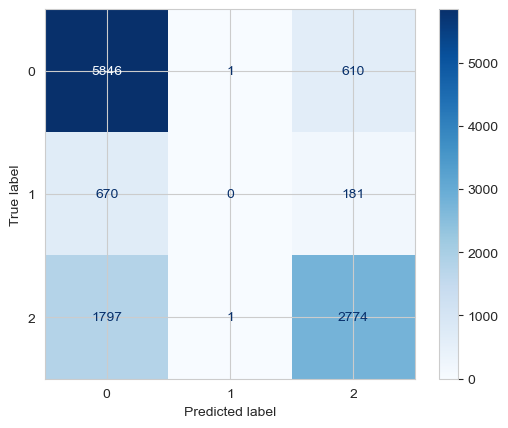

In [132]:
# Import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

## Model 2: Decision Tree

In [133]:
# Instantiate DT Classifier
clf = DecisionTreeClassifier(random_state=10, criterion='entropy')  

# Fit Training Data on Model
clf.fit(X_train_full, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [134]:
# Make predictions for train data
y_pred_train = clf.predict(X_train_full)

# Make predictions for test data
y_pred_test = clf.predict(X_test_full)

In [135]:
# Calculate accuracy 
print('Training Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test))

Training Accuracy:  0.9286616161616161
Testing Accuracy:  0.738973063973064


#### *Classifier was  73.90% on our testing data! Improvement from Model 1 both on the training & testing data.*

In [136]:
#retraining classifier with optimal values
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=10,
                           min_samples_split=20,
                           min_samples_leaf=0.25, 
                           random_state=10)
dt.fit(X_train_full, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=6,
                       min_samples_leaf=0.25, min_samples_split=20,
                       random_state=10)

In [137]:
#predictions on test data
y_pred2_test = dt.predict(X_test_full)

#predictions on train data
y_pred2_train = dt.predict(X_train_full)

In [138]:
# Calculate accuracy 
print('Training Accuracy: ', accuracy_score(y_train, y_pred2_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred2_test))

Training Accuracy:  0.5429713804713805
Testing Accuracy:  0.5435185185185185


#### Worse classifier than the original classifier: Prediction accuracy down to 55% on both trainnig & testing datasets

In [139]:
# Further Retraining Model
dt_1 = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}
gs_tree = GridSearchCV(dt_1, param_grid, cv=3)
gs_tree.fit(X_train_full, y_train)

gs_tree.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

In [140]:
# Print confusion matrix
cfn_matrix = confusion_matrix(y_test, y_pred2_test)
print('Confusion Matrix:\n', cfn_matrix)

Confusion Matrix:
 [[6457    0    0]
 [ 851    0    0]
 [4572    0    0]]


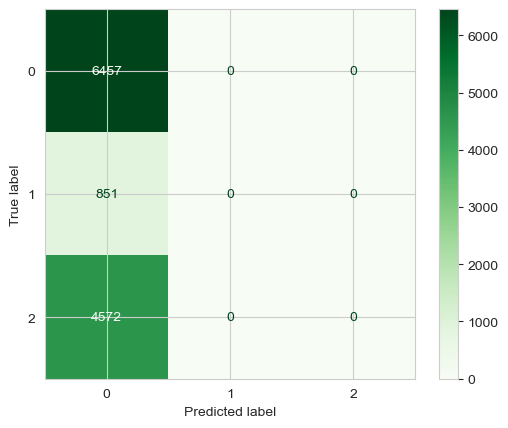

In [141]:
dips = ConfusionMatrixDisplay(confusion_matrix=cfn_matrix, display_labels=clf.classes_)
dips.plot(cmap=plt.cm.Greens)

## Model 3: K-Nearest Neighbors

In [142]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [143]:
# Instantiate KNeighborsClassifier
clfs = KNeighborsClassifier(n_neighbors = 25)

# Fit the classifier
clfs.fit(X_train_full, y_train)

# Predict on the test set
y_preds_test = clf.predict(X_test_full)

# Predict on the trainin set
y_preds_train = clf.predict(X_train_full)

In [144]:
# Calculate accuracy 
print('Training Accuracy: ', accuracy_score(y_train, y_preds_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_preds_test))

Training Accuracy:  0.9286616161616161
Testing Accuracy:  0.738973063973064


In [145]:
# Print confusion matrix
cf_matrix = confusion_matrix(y_test, y_preds_test)
print('Confusion Matrix:\n', cf_matrix)

Confusion Matrix:
 [[5257  342  858]
 [ 469  230  152]
 [1140  140 3292]]


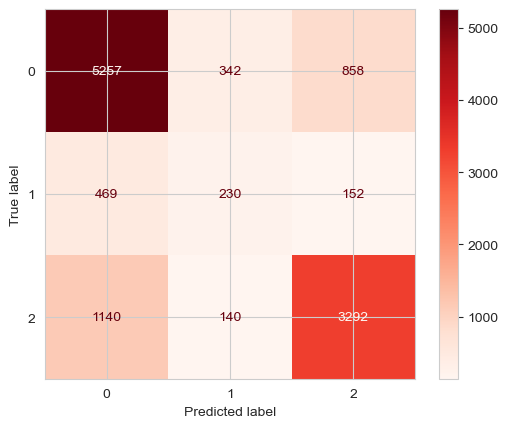

In [146]:
dis = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=clfs.classes_)
dis.plot(cmap=plt.cm.Reds)

## Model 4: Random Forest

In [147]:
#Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

# Fit model
forest.fit(X_train_full, y_train)

RandomForestClassifier(max_depth=5)

In [148]:
# Predicting train data
y_pr_train = forest.predict(X_train_full)

# Predicting test data
y_pr_test = forest.predict(X_test_full)

In [149]:
# Calculating score
print('Training Accuracy: ', accuracy_score(y_train, y_pr_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_pr_test))

Training Accuracy:  0.7135311447811448
Testing Accuracy:  0.7131313131313132


#### Model accuracy prediction lowest  71.31% on testing data!

In [150]:
# Print confusion matrix
cfsn_matrix = confusion_matrix(y_test, y_pr_test)
print('Confusion Matrix:\n', cfsn_matrix)

Confusion Matrix:
 [[6237    0  220]
 [ 775    0   76]
 [2337    0 2235]]


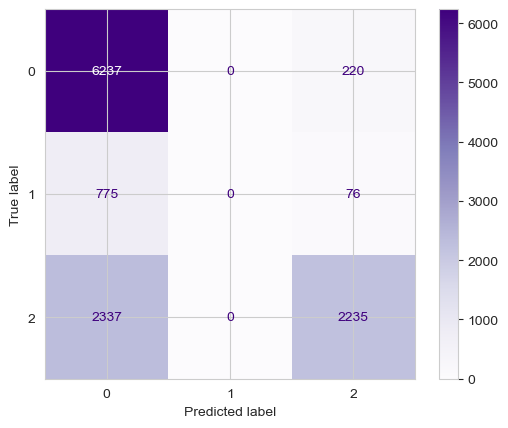

In [151]:
dsp = ConfusionMatrixDisplay(confusion_matrix=cfsn_matrix, display_labels=forest.classes_)
dsp.plot(cmap=plt.cm.Purples)

### *KNN MODEL WITH ACCURACY RATE 74% SETTLED ON*

#### Features Importance

In [162]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_full, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train_full.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


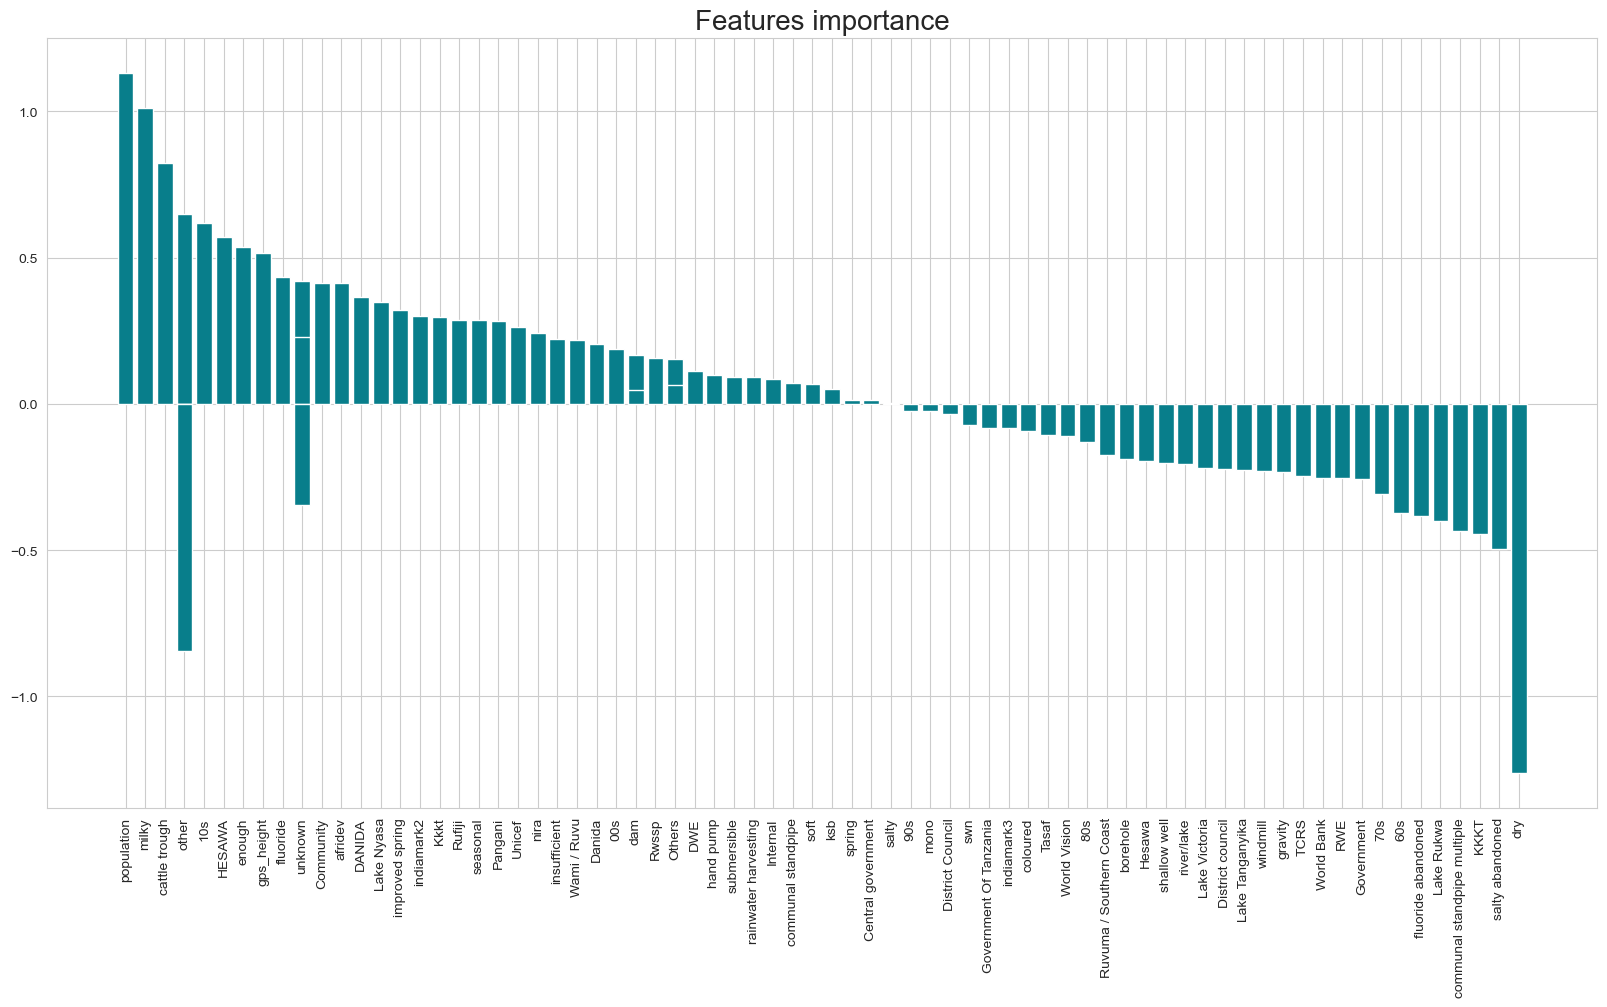

In [164]:
plt.figure(figsize=(20,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Features importance', size=20)
plt.xticks(rotation='vertical')
plt.show()

# RECOMMENDATIONS

For large complex datasets like the Tanzania wells data, which had 59,400 observations, simple data analysis using Excel would be difficult, so Machine Learning is ideal because it is used for large complex datasets allowing the visualization of patterns and relationships that would ideally be missed by simple data analysis methods

The Tanzania well dataset has both categorical and numerical datasets, so ML was able to provide algorithms to identify patterns and relationships in the data such as in places where wells in a sparse population, the wells was rarely used and needed repair. Such wells need to be identified if there is need for repair or maintenance

For large dataset, data cleaning is key to ensure data quality prior to applying ML algorithms, in this data we dropped variables like latitude, longitude, district codes etc. which were not necessary for our model.

The characteristic of the dataset is determined by the data type and goal of analysis, e.g. For the Tanzania wells data set we used Decision tress KNN was the best model it had 73.9%  accuracy score meaning the model correctly predicted the classification levels

The analysis showed that data collected should highlight more on non-functional pumps or those in need of repair so that they can plan resource allocation for repairs and maintenance 

# CONCLUSSION/SUGGESTIONS

Areas requiring improvement to further increase our preffered models' predictive power:

- Further Tuning: More fine tuning to improve model accuracy
- Try More Classifiers & Consider using more complex ensemble models (Bagging, Stacking)
- Consider using more features provided in Original dataset